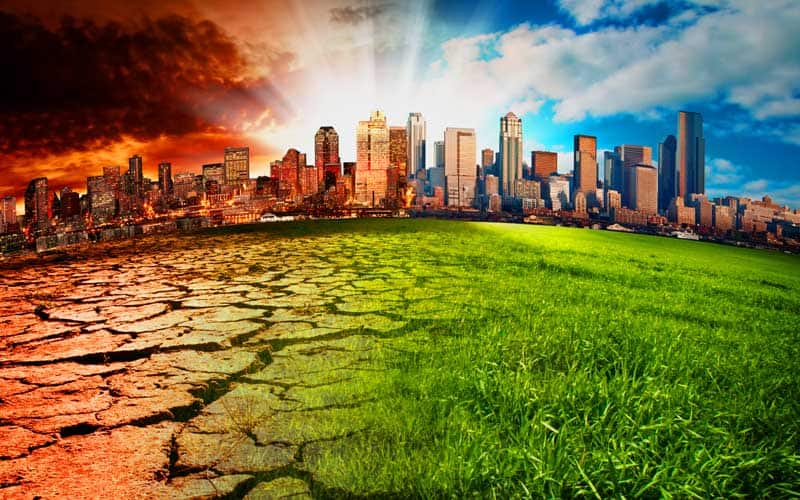
# 🌍 Global Air Quality Analysis

# Objective

The primary goal of this project is to analyze global air quality trends across 170 countries and 300+ cities.
This dataset focuses on crucial pollutants such as Carbon Monoxide (CO), Ozone (O3), Nitrogen Dioxide (NO2), 
and Particulate Matter (PM2.5). By leveraging this dataset, we aim to:

1. **Understand Global Air Quality Trends**
   - Identify the best and worst cities in terms of air quality.
   - Compare air quality across countries and continents.

2. **Investigate Correlations**
   - Explore the relationship between different pollutants and overall AQI values.
   - Identify patterns in pollution levels across different regions.

3. **Data-Driven Insights for Policy and Health**
   - Highlight regions that need urgent air quality improvements.
   - Provide insights for policymakers to mitigate pollution.

4. **Potential Predictive Modeling** 
   - Develop a machine learning model to predict AQI values based on pollutants.
   - Identify key factors influencing air quality levels.

5. **Comprehensive Analysis and Presentation**
   - Document the entire analysis process in a well-structured Jupyter Notebook.
   - Use clear explanations, visualizations, and insights to make findings accessible.


### Dataset Overview

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
# Load the dataset
dataset_path = "global_air_pollution_data.csv"
df = pd.read_csv(dataset_path)

In [3]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [4]:
# Display the first few rows of the dataset
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [5]:
# Check for missing values
df.isnull().sum()


country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

The dataset contains missing values in some key columns:

- **`country_name`**: 427 missing values. This is significant and may impact country-level analysis.
- **`city_name`**: 1 missing value. This is minor but might need to be addressed.


In [6]:
# Summary statistics
df.describe()

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [7]:
# Rename the incorrect column with extra tab
df.rename(columns={"co_aqi_value\t": "co_aqi_value"}, inplace=True)
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

### Data Cleaning

In [8]:
# Drop rows where country_name is missing
df = df.dropna(subset=['country_name'])
# Drop the single row where city_name is missing
df = df.dropna(subset=['city_name'])
df.isnull().sum()


country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value          0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64

Now, the dataset contains no missing values.

In [9]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

No duplicate rows were found in the dataset.

In [10]:
df.shape

(23035, 12)

### Exploratory Data Analysis (EDA)

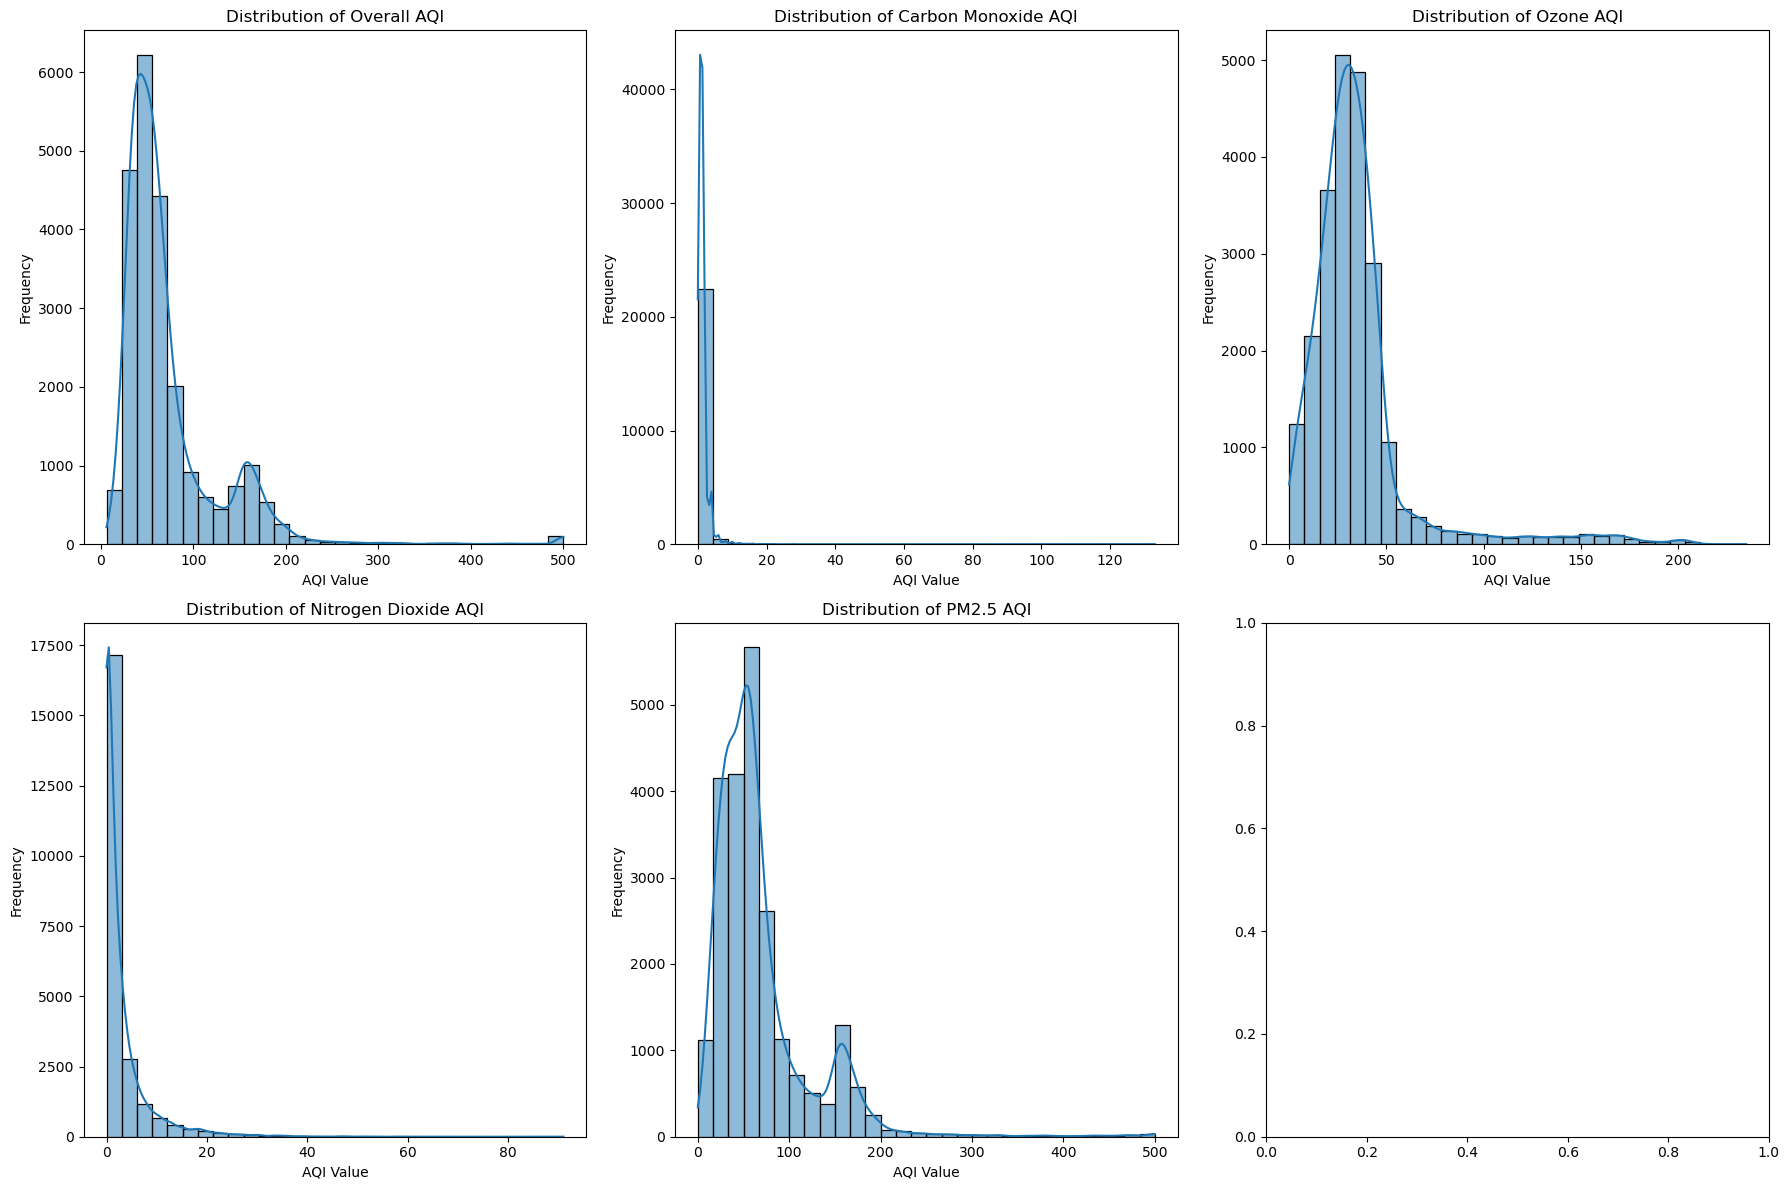

In [11]:
# Plot Histogram of AQI and Pollutant Distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

columns = ['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']
titles = ['Overall AQI', 'Carbon Monoxide AQI', 'Ozone AQI', 'Nitrogen Dioxide AQI', 'PM2.5 AQI']

for i, ax in enumerate(axes.flatten()[:5]):
    sns.histplot(df[columns[i]], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {titles[i]}')
    ax.set_xlabel('AQI Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms above show the distribution of **AQI values** and key pollutants (**CO, Ozone, NO2, and PM2.5**) across various cities.

#### **Key Observations:**
- **Overall AQI Distribution:**
  - The majority of AQI values are below **100**, indicating that most cities experience moderate air quality.
  - However, there are extreme cases where AQI reaches the **500** limit, suggesting severe pollution in some regions.

- **Carbon Monoxide (CO) AQI:**
  - Most cities have **low CO levels** with an AQI close to **1**, but a few outliers reach as high as **133**.

- **Ozone (O₃) AQI:**
  - The distribution is **right-skewed**, meaning most cities have low ozone levels, but some experience significant pollution up to **235**.

- **Nitrogen Dioxide (NO₂) AQI:**
  - Many cities have **near-zero NO₂ levels**, but in some cases, it spikes up to **91**, indicating localized pollution sources.

- **PM2.5 (Fine Particulate Matter) AQI:**
  - Similar to overall AQI, PM2.5 values vary widely, with some locations experiencing hazardous levels up to **500**.

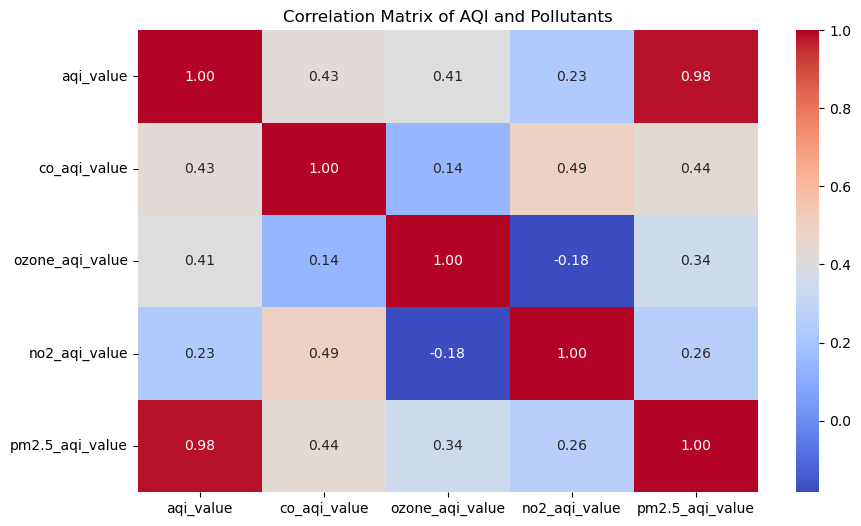

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of AQI and Pollutants")
plt.show()

The heatmap above visualizes the correlation between **overall AQI** and key pollutants (**CO, Ozone, NO₂, and PM2.5**). 

#### **Key Observations:**
- **PM2.5 (Fine Particulate Matter) has the strongest correlation with AQI**  
  - A **high positive correlation** suggests that PM2.5 is a major contributor to poor air quality.
  - This aligns with real-world observations, as fine particulate matter is a leading cause of air pollution.

- **Ozone (O₃) also has a notable correlation with AQI**  
  - While not as strong as PM2.5, ozone pollution significantly impacts air quality in many cities.

- **CO (Carbon Monoxide) and NO₂ (Nitrogen Dioxide) show weaker correlations**  
  - These pollutants may contribute to poor air quality in specific regions, but their overall impact on AQI appears less significant.
  - NO₂ is often associated with vehicle emissions, which may explain localized spikes rather than a global trend.

In [13]:
# Further Analysis: Identify Most and Least Polluted Cities

# Top 10 Most Polluted Cities (Highest AQI)
most_polluted = df[['city_name', 'country_name', 'aqi_value']].sort_values(by='aqi_value', ascending=False).head(10)

# Top 10 Least Polluted Cities (Lowest AQI)
least_polluted = df[['city_name', 'country_name', 'aqi_value']].sort_values(by='aqi_value', ascending=True).head(10)

# Display the Top 10 Most Polluted and Least Polluted Cities using Pandas
print("\nTop 10 Most Polluted Cities:")
display(most_polluted)

print("\nTop 10 Least Polluted Cities:")
display(least_polluted)



Top 10 Most Polluted Cities:


,city_name,country_name,aqi_value
9107,Faridnagar,India,500
8101,Gopamau,India,500
12721,Jalalabad,India,500
17141,Pilibanga,India,500
6990,Nuh,India,500
12354,Hansi,India,500
2858,Bareli,India,500
20567,Sasni,India,500
22259,Tynda,Russian Federation,500
21639,Jhunjhunun,India,500



Top 10 Least Polluted Cities:


,city_name,country_name,aqi_value
512,El Torno,Bolivia (Plurinational State of),6
9194,Macas,Ecuador,7
23269,Tari,Papua New Guinea,8
14502,Azogues,Ecuador,8
7486,Huaraz,Peru,9
9607,Manokwari,Indonesia,10
3564,Nueva Loja,Ecuador,10
11769,Puerto Asis,Colombia,10
7792,Huancavelica,Peru,10
15578,Junin,Peru,10


C:\Users\MKFasasi\AppData\Local\Temp\ipykernel_12232\2760858860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aqi_category', y='aqi_value', data=df, palette="coolwarm")


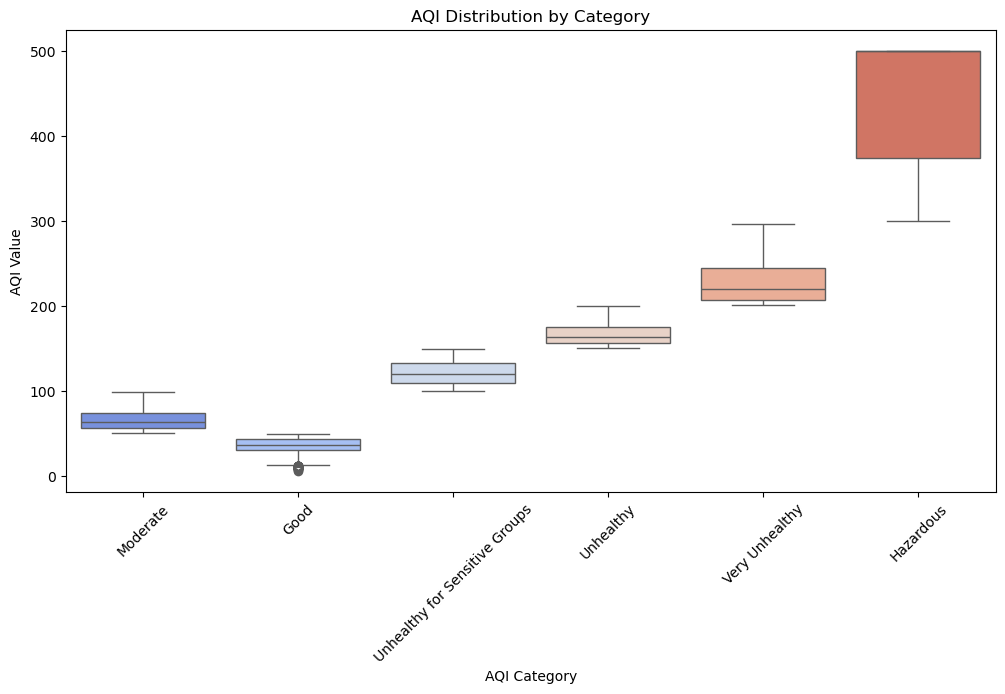

In [14]:
# AQI Distribution by Category

plt.figure(figsize=(12, 6))
sns.boxplot(x='aqi_category', y='aqi_value', data=df, palette="coolwarm")
plt.title("AQI Distribution by Category")
plt.xlabel("AQI Category")
plt.ylabel("AQI Value")
plt.xticks(rotation=45)
plt.show()

### **AQI Distribution by Category**
The boxplot above visualizes the spread of Air Quality Index (AQI) values across different AQI categories.

#### **Key Observations:**
- **Higher variability in "Unhealthy" and "Hazardous" categories**  
  - The "Hazardous" category has the **widest range**, showing extreme pollution cases.
  - Some cities classified as **"Unhealthy" have lower AQI values**, indicating potential misclassification or borderline cases.

- **Outliers in "Moderate" and "Unhealthy for Sensitive Groups"**  
  - These categories contain some cities with unusually high AQI values, which may need further investigation.

- **Overall Trend:**  
  - The median AQI increases progressively from "Good" to "Hazardous."
  - The Interquartile Range (IQR) expands in more severe pollution categories, showing higher AQI fluctuations in these groups. 


C:\Users\MKFasasi\AppData\Local\Temp\ipykernel_12232\1206782474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_polluted['city_name'], x=most_polluted['aqi_value'], palette="Reds_r")


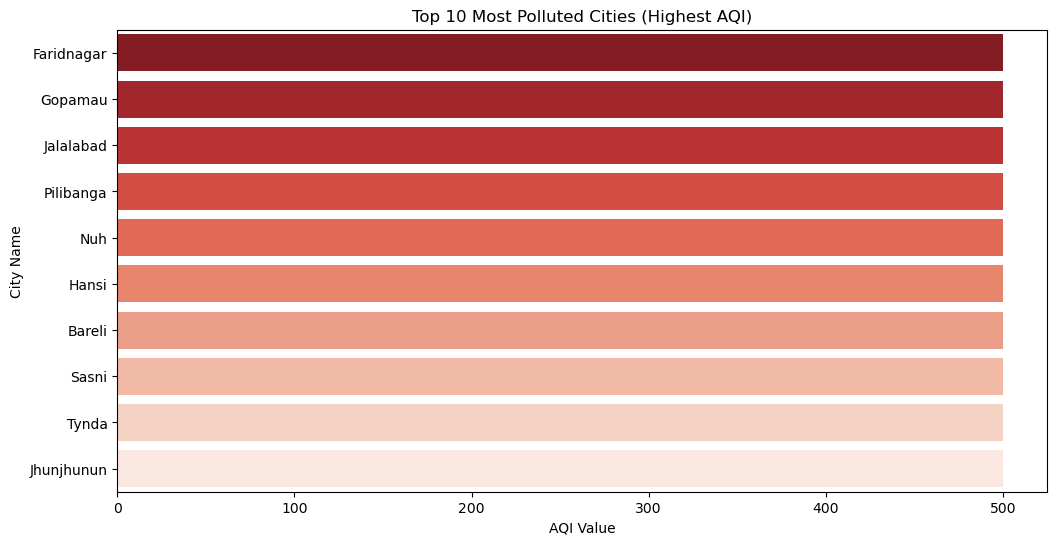

In [15]:
# Bar Chart: Top 10 Most Polluted Cities
plt.figure(figsize=(12, 6))
sns.barplot(y=most_polluted['city_name'], x=most_polluted['aqi_value'], palette="Reds_r")
plt.title("Top 10 Most Polluted Cities (Highest AQI)")
plt.xlabel("AQI Value")
plt.ylabel("City Name")
plt.show()

C:\Users\MKFasasi\AppData\Local\Temp\ipykernel_12232\4023184960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=least_polluted['city_name'], x=least_polluted['aqi_value'], palette="Blues_r")


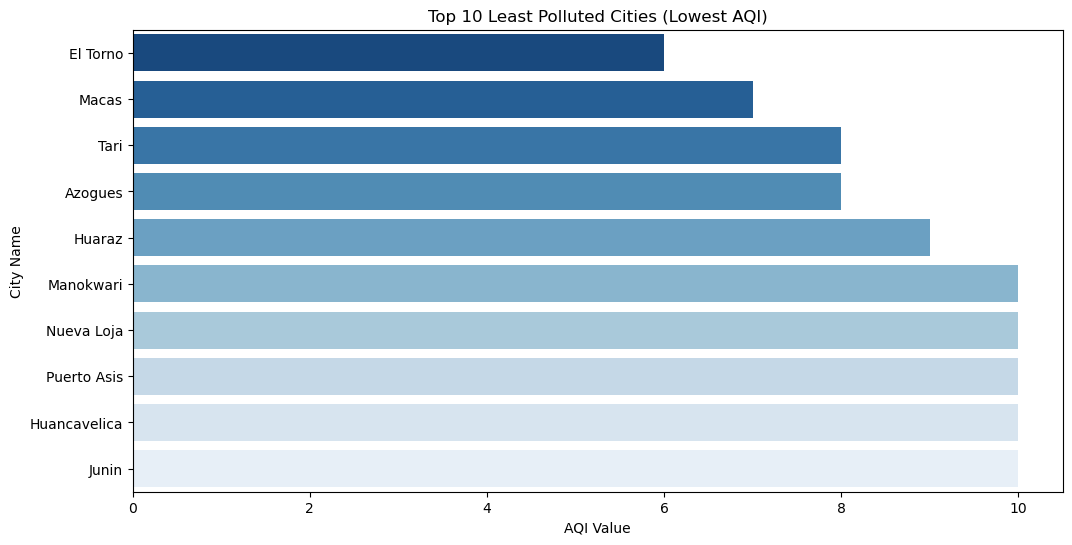

In [16]:
# Bar Chart: Top 10 Least Polluted Cities
plt.figure(figsize=(12, 6))
sns.barplot(y=least_polluted['city_name'], x=least_polluted['aqi_value'], palette="Blues_r")
plt.title("Top 10 Least Polluted Cities (Lowest AQI)")
plt.xlabel("AQI Value")
plt.ylabel("City Name")
plt.show()

### **Top 10 Most and Least Polluted Cities - Bar Charts**
These bar charts provide a clear comparison of **the most and least polluted cities** based on AQI values.

#### **🔹 Most Polluted Cities (Highest AQI)**
- All the **top 10 most polluted cities** have an **AQI of 500**, indicating hazardous air quality.
- **India dominates the list**, suggesting severe pollution concerns in multiple cities.
- **Tynda (Russia)** is the only non-Indian city in the list, indicating regional pollution hotspots.

#### **🔹 Least Polluted Cities (Lowest AQI)**
- The **least polluted cities** have **AQI values ranging from 6 to 10**, signifying excellent air quality.
- **El Torno (Bolivia) has the lowest AQI (6)**, followed by **Macas (Ecuador) and Tari (Papua New Guinea)**.
- Many of these cities are in **South America and Southeast Asia**, where lower industrialization and high vegetation may contribute to cleaner air.


C:\Users\MKFasasi\AppData\Local\Temp\ipykernel_12232\4271399789.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi_country.values, y=avg_aqi_country.index, palette='flare')


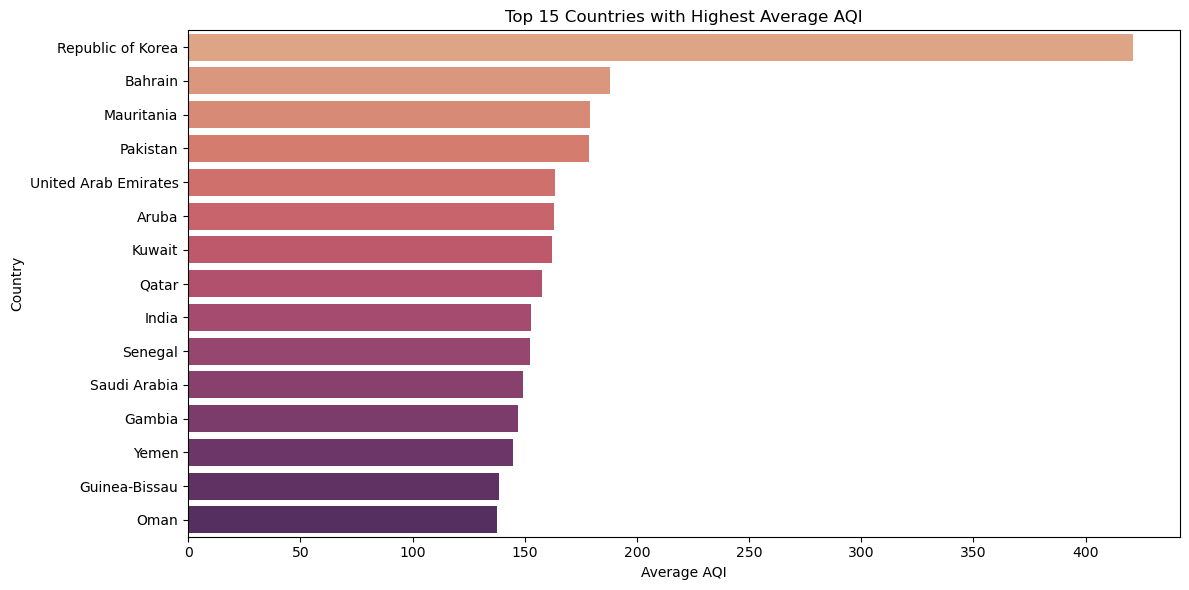

In [17]:
# --- 1. Average AQI by Country ---
avg_aqi_country = df.groupby('country_name')['aqi_value'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_aqi_country.values, y=avg_aqi_country.index, palette='flare')
plt.title("Top 15 Countries with Highest Average AQI")
plt.xlabel("Average AQI")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### **Average AQI by Country (Top 15)**
The bar chart above displays the **top 15 countries** with the **highest average Air Quality Index (AQI)** values.

#### **Key Observations:**
- These countries have the **poorest overall air quality** based on aggregated AQI data.
- High average AQI values may result from:
  - **Urbanization and industrial activity**
  - **Poor environmental regulations**
  - **Traffic congestion and emissions**
  - **Seasonal or regional pollution events (e.g., wildfires, dust storms)**

- While AQI may fluctuate within each country, a **consistently high average** suggests a **systemic air pollution issue**.

C:\Users\MKFasasi\AppData\Local\Temp\ipykernel_12232\1957702923.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dominant_pollutant', data=df, order=df['dominant_pollutant'].value_counts().index, palette="Set2")


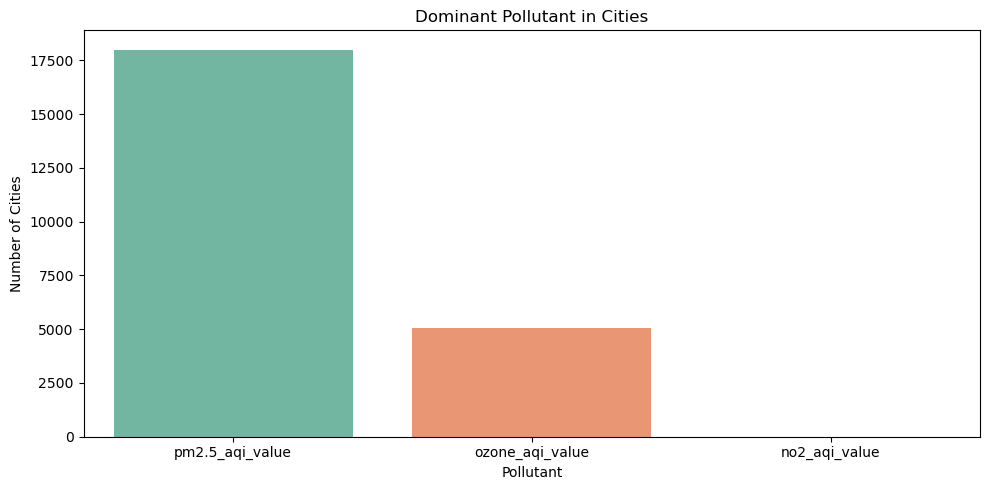

In [18]:
# --- 2. Pollutant Contribution Analysis: Highest Contributor per City ---
# Dominant pollutant for each city
df['dominant_pollutant'] = df[['co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']].idxmax(axis=1)

# Plot dominant pollutant counts
plt.figure(figsize=(10, 5))
sns.countplot(x='dominant_pollutant', data=df, order=df['dominant_pollutant'].value_counts().index, palette="Set2")
plt.title("Dominant Pollutant in Cities")
plt.xlabel("Pollutant")
plt.ylabel("Number of Cities")
plt.tight_layout()
plt.show()

### **Dominant Pollutant in Cities**
This bar chart shows the **most frequent dominant pollutant** in each city, based on the pollutant with the **highest AQI value**.

#### **Key Observations:**
- **PM2.5 (Particulate Matter)** is the **most common dominant pollutant**, affecting a large number of cities.
  - This suggests that fine particulate matter is the **primary driver of poor air quality** globally.
  - PM2.5 is known for its ability to **penetrate deep into the lungs and bloodstream**, posing serious health risks.

- **Ozone (O₃)** and **Nitrogen Dioxide (NO₂)** appear less frequently but still dominate in certain cities.
  - These pollutants are often linked to **vehicular emissions** and **industrial output**.

- **Carbon Monoxide (CO)** is the **least frequent dominant pollutant**, likely because it's more localized and less persistent in the atmosphere.

#### **Why This Matters:**
- Understanding the dominant pollutant helps **prioritize mitigation strategies** for each city.
- Cities where **PM2.5 dominates** may need to **regulate industrial emissions**, **burning practices**, or **construction dust**.
- Where **O₃ or NO₂ dominates**, emphasis may be placed on **traffic control** and **vehicle emissions standards**.

C:\Users\MKFasasi\AppData\Local\Temp\ipykernel_12232\1991569351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aqi_category', y=pollutant, data=df, palette='coolwarm')
C:\Users\MKFasasi\AppData\Local\Temp\ipykernel_12232\1991569351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aqi_category', y=pollutant, data=df, palette='coolwarm')
C:\Users\MKFasasi\AppData\Local\Temp\ipykernel_12232\1991569351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aqi_category', y=pollutant, data=df, palette='coolwarm')
C:\Users\MKFasasi\A

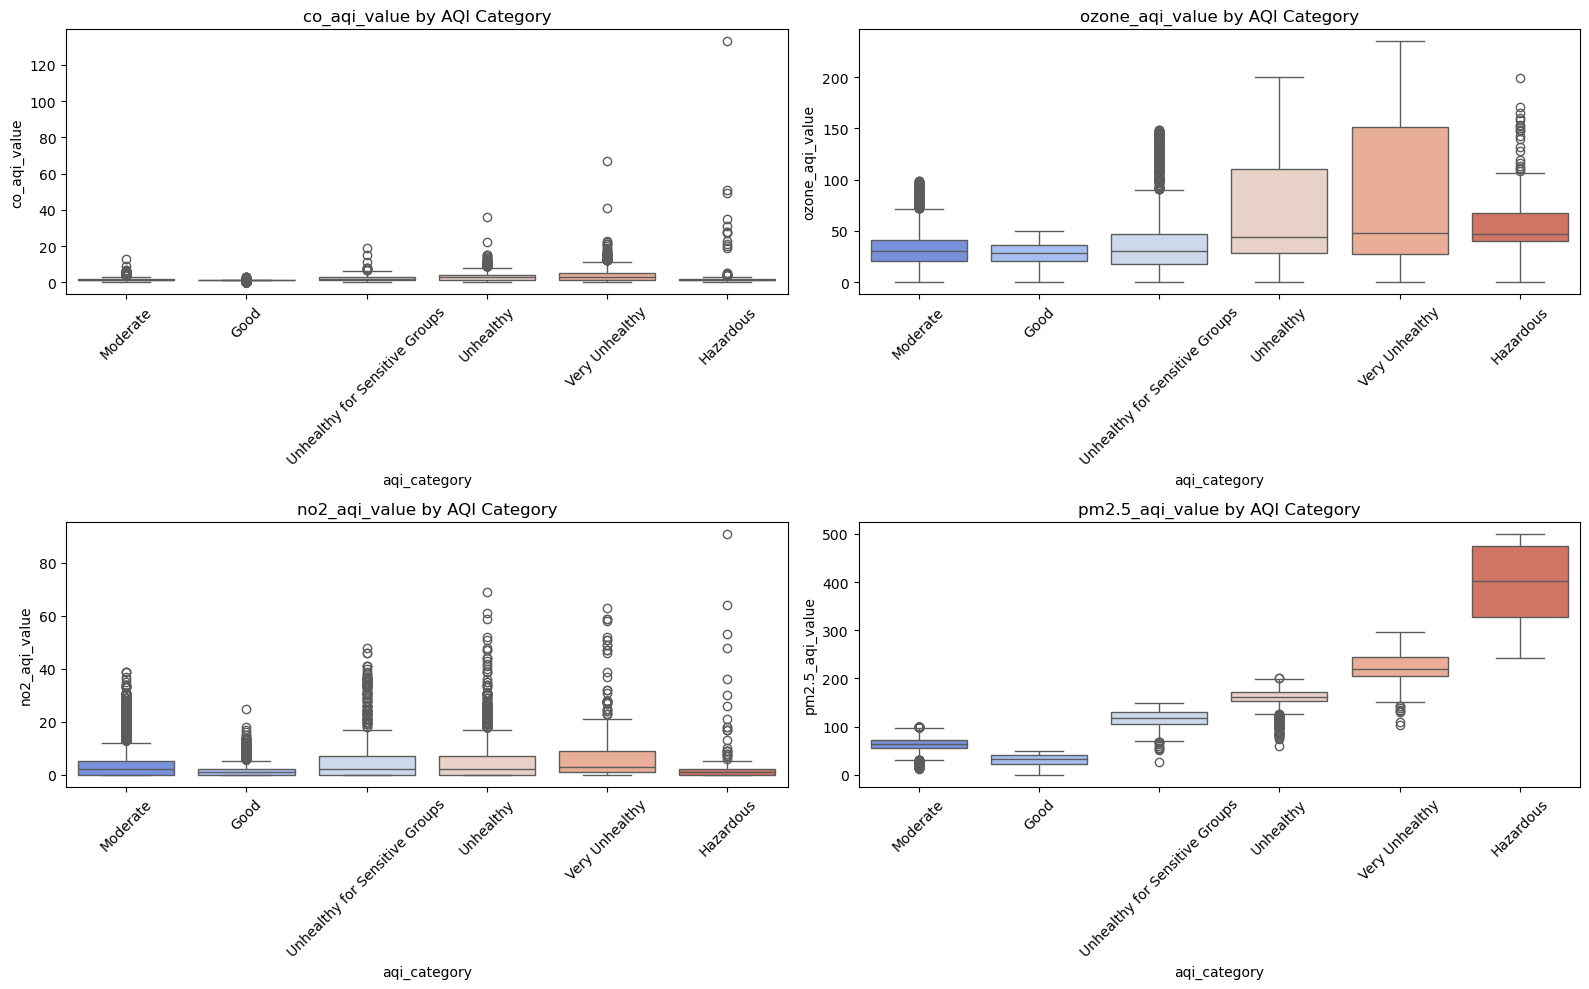

In [19]:
# --- 3. Boxplot: Pollutant AQI by AQI Category ---
pollutants = ['co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']

plt.figure(figsize=(16, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='aqi_category', y=pollutant, data=df, palette='coolwarm')
    plt.title(f"{pollutant} by AQI Category")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

### **Pollutant AQI by AQI Category**
The boxplots above show how the AQI values of individual pollutants (**CO, Ozone, NO₂, and PM2.5**) vary across the overall **AQI categories** — from "Good" to "Hazardous."

#### **Key Observations:**
- **PM2.5** shows a **clear increase** across AQI categories:
  - Cities in the "Unhealthy" to "Hazardous" range tend to have significantly higher PM2.5 values.
  - This reinforces PM2.5 as a **major contributor** to severe air quality levels.

- **Ozone (O₃)** and **NO₂** also show **increasing trends**, though with more variation:
  - Ozone levels rise in higher AQI categories but with notable outliers.
  - NO₂ levels are low in most cities but spike in a few urban/industrial areas.

- **CO (Carbon Monoxide)** remains relatively low across all categories:
  - This suggests CO is **not the primary pollutant** driving overall AQI values in most cases.

#### **Plot Importance:**
- These plots help identify **which pollutants dominate specific AQI categories**.
- PM2.5's strong presence in poor air quality categories indicates a **critical need for fine particulate pollution control**.


### Predictive Modeling

In [22]:
features = ['co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']
target = 'aqi_value'

X = df[features]
y = df[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_preds

array([141.40569168, 155.35076549,  36.44885191, ...,  34.1737836 ,
        54.97262896,  47.08656175])

In [27]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_preds

array([139., 154.,  37., ...,  35.,  55.,  48.])

In [32]:
# Evaluate Models
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree Regressor", y_test, dt_preds)


Linear Regression Performance:
R² Score: 0.9744
MAE: 4.91
RMSE: 9.23

Decision Tree Regressor Performance:
R² Score: 0.9955
MAE: 0.28
RMSE: 3.88


### **Model Evaluation: AQI Prediction**

We trained and evaluated two models to predict the **overall AQI (`aqi_value`)** using pollutant AQI levels as input features:

#### **1. Linear Regression**
- **R² Score: 0.9744**  
  - The model explains **97.44%** of the variance in AQI values, indicating a strong linear relationship between pollutants and AQI.
- **MAE: 4.91**  
  - On average, the model's predictions are off by **about 4.91 AQI units**, which is quite low and acceptable.
- **RMSE: 9.23**  
  - The root mean squared error shows slightly more sensitivity to outliers but remains relatively low.

#### **2. Decision Tree Regressor**
- **R² Score: 0.9955**  
  - This model explains **99.55%** of the variance in AQI, capturing nearly all of the relationships in the data.
- **MAE: 0.28**  
  - Incredibly low average error — the predictions are almost **spot-on**.
- **RMSE: 3.88**  
  - Further confirms the model's **high accuracy and robustness**.

🟢 **Conclusion:** Decision Tree performs exceptionally well and outperforms Linear Regression in both accuracy and error metrics.

Text(0, 0.5, 'Predicted AQI')

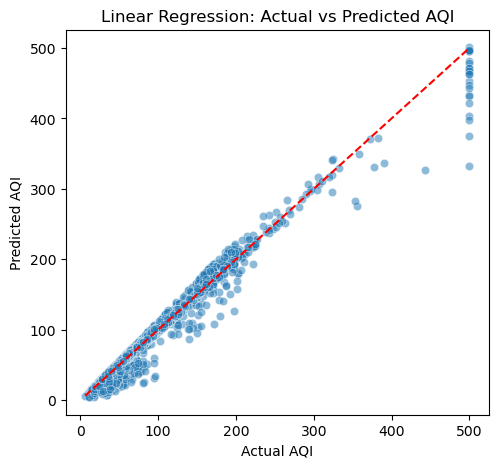

In [34]:
# Visualize Predictions vs Actual
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Linear Regression: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")

The scatter plot above compare the **actual AQI values** (x-axis) to the **predicted AQI values** (y-axis) from Linear Regression model:

- Points are generally aligned along the red dashed line (ideal prediction).
- Some **slight deviation at higher AQI values**, indicating the model may under- or over-predict extreme pollution cases.
- The model demonstrates a **strong linear relationship**.

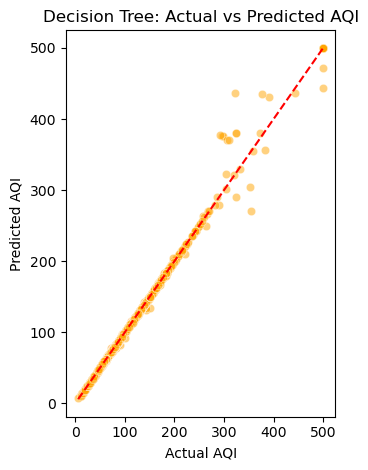

In [36]:
# Decision Tree
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=dt_preds, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Decision Tree: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")

plt.tight_layout()
plt.show()

The scatter plot above compare the **actual AQI values** (x-axis) to the **predicted AQI values** (y-axis) from Decision Tree Regressor
- Points are **tightly clustered** along the red dashed line, especially at both low and high AQI values.
- The plot shows a **very high degree of accuracy**, confirming the Decision Tree’s excellent performance from the metrics.
- Minimal noise and tighter fit suggest that the model has effectively learned the mapping between pollutants and AQI.

## ✅ Conclusion

This project provided a comprehensive analysis of global air quality using data from over 170 countries and 300+ cities. Here's a summary of our key findings and outcomes:

---

### 🌍 **Key Insights**
- **Most polluted cities** are concentrated in specific regions, especially in parts of India.
- **Least polluted cities** are often located in less industrialized regions like South America and Southeast Asia.
- **PM2.5** was identified as the most frequent **dominant pollutant**, making it the primary driver of poor air quality in most cities.
- Countries with the highest **average AQI** showed consistent exposure to unhealthy pollution levels.

---

### 📊 **Visual Reports**
- Created insightful visualizations showing:
  - AQI distribution by country and category.
  - Dominant pollutants in different cities.
  - Boxplots of pollutant levels across AQI categories.

---

### 🤖 **Predictive Modeling**
- **Linear Regression** and **Decision Tree Regressor** were trained to predict AQI using pollutant data.
- The **Decision Tree model performed exceptionally**, achieving:
  - R² Score: 0.9955
  - MAE: 0.28
  - RMSE: 3.88
- Prediction plots confirmed the **accuracy and reliability** of the model.